In [111]:
import numpy as np 
import pandas as pd

In [112]:
# Opening the Excel
data = pd.read_excel('./E Commerce Dataset.xlsx', sheet_name='E Comm')

print(data)

      CustomerID  Churn  Tenure PreferredLoginDevice  CityTier  \
0          50001      1     4.0         Mobile Phone         3   
1          50002      1     NaN                Phone         1   
2          50003      1     NaN                Phone         1   
3          50004      1     0.0                Phone         3   
4          50005      1     0.0                Phone         1   
...          ...    ...     ...                  ...       ...   
5625       55626      0    10.0             Computer         1   
5626       55627      0    13.0         Mobile Phone         1   
5627       55628      0     1.0         Mobile Phone         1   
5628       55629      0    23.0             Computer         3   
5629       55630      0     8.0         Mobile Phone         1   

      WarehouseToHome PreferredPaymentMode  Gender  HourSpendOnApp  \
0                 6.0           Debit Card  Female             3.0   
1                 8.0                  UPI    Male             3.0 

In [113]:
cat_cols = data.dtypes[data.dtypes == 'object'].index

for i in cat_cols:
    print(f"{i} ---> {data[i].unique()}")
    print()

PreferredLoginDevice ---> ['Mobile Phone' 'Phone' 'Computer']

PreferredPaymentMode ---> ['Debit Card' 'UPI' 'CC' 'Cash on Delivery' 'E wallet' 'COD' 'Credit Card']

Gender ---> ['Female' 'Male']

PreferedOrderCat ---> ['Laptop & Accessory' 'Mobile' 'Mobile Phone' 'Others' 'Fashion' 'Grocery']

MaritalStatus ---> ['Single' 'Divorced' 'Married']



In [114]:
# Replacing duplicate values
data["PreferredLoginDevice"].replace("Phone", "Mobile Phone", inplace = True)
data["PreferredPaymentMode"].replace(["CC", "COD"], ["Credit Card", "Cash On Delivery"], inplace = True)
data["PreferedOrderCat"].replace("Mobile Phone", "Mobile", inplace = True)

C:\Users\sayuj\AppData\Local\Temp\ipykernel_19864\4277807303.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["PreferredLoginDevice"].replace("Phone", "Mobile Phone", inplace = True)
C:\Users\sayuj\AppData\Local\Temp\ipykernel_19864\4277807303.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alway

In [115]:
cat_cols = data.dtypes[data.dtypes == 'object'].index

for i in cat_cols:
    print(f"{i} ---> {data[i].unique()}")
    print()

PreferredLoginDevice ---> ['Mobile Phone' 'Computer']

PreferredPaymentMode ---> ['Debit Card' 'UPI' 'Credit Card' 'Cash on Delivery' 'E wallet'
 'Cash On Delivery']

Gender ---> ['Female' 'Male']

PreferedOrderCat ---> ['Laptop & Accessory' 'Mobile' 'Others' 'Fashion' 'Grocery']

MaritalStatus ---> ['Single' 'Divorced' 'Married']



In [116]:
# Data type in the data set and column
data.info()

# Convert all the data type into integer
from sklearn.preprocessing import LabelEncoder # Convert objects into numerical values

label_encoder = LabelEncoder()
for column in data.select_dtypes(include='object'):
    data[column] = label_encoder.fit_transform(data[column])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [117]:
# Checking the data types again
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   int32  
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   int32  
 7   Gender                       5630 non-null   int32  
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   int32  
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   int32  
 13  NumberOfAddress   

In [118]:
# Missing Data
data.isnull().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [119]:
# # We have to fill the missing value, using the value nearest to it i.e. Mean or Median

# # First find the column with missing value
# column_with_missing_value = [col for col in data.columns if data[col].isnull().sum() > 0]

# # Now fill the missing values with median
# for col in column_with_missing_value:
#     median_value = data[col].median()
#     data[col].fillna(median_value, inplace = True)

# data.isnull().sum()

data.dropna(how = 'any', inplace = True)

In [120]:
# Number of Churners vs Non-Churners
data['Churn'].value_counts()

Churn
0    3143
1     631
Name: count, dtype: int64

In [121]:
# Since churn data is less so we need to oversample or properly balance the data
from sklearn.utils import resample

no_churn_data = data.loc[data['Churn'] == 0]
churn_data = data.loc[data['Churn'] == 1]

# calculate the total number of each data
no_churn_count = len(no_churn_data)
churn_count = len(churn_data)

# Now we apply the oversampling data
data_rearrange = resample(churn_data, replace = True, n_samples = no_churn_count, random_state = 42)

In [122]:
# We combine the oversampled minority (i.e. churn) with majority class (i.e. no churn)
new_data = pd.concat([data_rearrange, no_churn_data])

# We shuffle the rows to ensure combined dataset are properly randomized
new_data = new_data.sample(frac =  1) # frac = 1 means all the rows will be shuffled

# Now reset the index of the new dataset
new_data.reset_index(drop = True, inplace = True)

In [123]:
# Checking the new Churn Value
new_data['Churn'].value_counts()

Churn
1    3143
0    3143
Name: count, dtype: int64

In [124]:
# Splitting into Train and Test Dataset (70% - 30%)
x = new_data.drop(['Churn'], axis = 1)
y = new_data['Churn']

from  sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Now we  will make normalization for all data to make them in common range
from sklearn.preprocessing import MinMaxScaler

MN = MinMaxScaler()
x_train_scaled = MN.fit_transform(x_train)
x_test_scaled = MN.fit_transform(x_test)

Accuracy = 0.971898197242842

Classification Report of Random Forest:
              precision    recall  f1-score   support

           0     0.9807    0.9632    0.9719       952
           1     0.9632    0.9807    0.9719       934

    accuracy                         0.9719      1886
   macro avg     0.9720    0.9720    0.9719      1886
weighted avg     0.9721    0.9719    0.9719      1886



(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

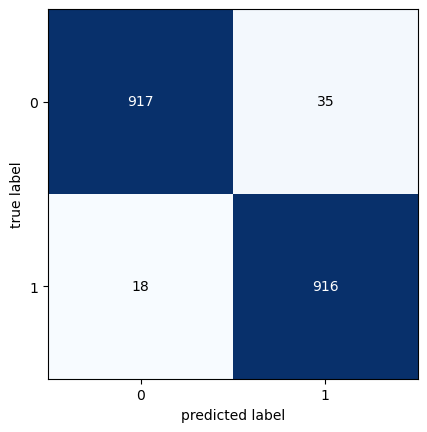

In [125]:
# Usually need to install using 'pip install mlxtend' in cmd
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()

# Trains the model on the normalized training data
rf_model.fit(x_train_scaled, y_train) 

# After training, we use it to predict the churn
y_pred_rf = rf_model.predict(x_test_scaled) 

# After prediction for accuracy testing
# Test the accuracy of predicted to the test or known data
accuracy = accuracy_score(y_test, y_pred_rf) 

print(f"Accuracy = {format(accuracy)}") 

print(f"\nClassification Report of Random Forest:\n{classification_report(y_test, y_pred_rf, digits=4)}") 
plot_confusion_matrix(confusion_matrix(y_test , y_pred_rf)) # Computes the confusion matrix

In [126]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Input, Dense

print(x_train.shape)

(4400, 19)


In [127]:
ann_model = Sequential()
ann_model.add(Input(shape=(19,)))  # Input layer with 19 features
ann_model.add(Dense(32, activation='relu'))  # First hidden layer with 32 neurons
ann_model.add(Dense(16, activation='relu'))  # Second hidden layer with 16 neurons
ann_model.add(Dense(1, activation='sigmoid')) # Output Layer

ann_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
churn = ann_model.fit(x_train_scaled, y_train, epochs=100)

Epoch 1/100
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5769 - loss: 0.6788
Epoch 2/100
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7166 - loss: 0.5879
Epoch 3/100
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7560 - loss: 0.5231
Epoch 4/100
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8059 - loss: 0.4541
Epoch 5/100
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8197 - loss: 0.4287
Epoch 6/100
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8251 - loss: 0.4140
Epoch 7/100
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8424 - loss: 0.3798
Epoch 8/100
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8401 - loss: 0.3785
Epoch 9/100
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8445 - loss: 0.3673
Epoch 10/100
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8456 - loss: 0.3598
Epoch 11/100
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8539 - loss: 0.3499
Epoch 12/100
138/138 ━━━━━━━━━━━━━━━━━━━━

59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Accuracy = 0.8260869565217391

Classification Report of ANN:
              precision    recall  f1-score   support

           0     0.8406    0.8088    0.8244       952
           1     0.8124    0.8437    0.8277       934

    accuracy                         0.8261      1886
   macro avg     0.8265    0.8263    0.8261      1886
weighted avg     0.8266    0.8261    0.8261      1886



(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

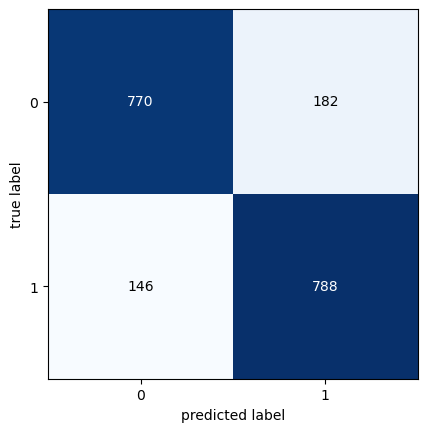

In [128]:
y_pred_ann = ann_model.predict(x_test_scaled)
y_pred_binary = (y_pred_ann > 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred_binary) 
print(f"Accuracy = {format(accuracy)}") 

print(f"\nClassification Report of ANN:\n{classification_report(y_test, y_pred_binary, digits=4)}") 
plot_confusion_matrix(confusion_matrix(y_test, y_pred_binary)) # Computes the confusion matrix